In [1]:
import os
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.callbacks import EarlyStopping, CSVLogger, LearningRateScheduler, ModelCheckpoint
from keras.layers import Input, Dense, Dropout, Flatten, LSTM, GRU, BatchNormalization, GlobalAveragePooling1D
from keras.models import load_model, Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/캡스톤디자인I/EEG_DATA_Shuffle_250.csv'
dataDF = pd.read_csv(path)
dataDF = dataDF[dataDF.iloc[:, -1] != 2]
dataDF = dataDF.drop('Unnamed: 0', axis=1)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1,2.0749,10.4531,15.0722,-26.6312,-0.4459,14.5893,9.2869,-2.1056,-43.6692,-17.2096,...,-6.9518,-11.4253,-1.2506,-17.1243,-7.5738,-10.9374,-19.9238,3.2310,-5.6850,4.0
2,-120.1452,-125.0708,-105.8275,-82.4281,-56.1819,-83.7586,-50.9381,-60.4048,-104.6791,-12.6753,...,39.6871,13.5448,1.8542,-12.6098,11.4994,56.9190,30.9258,-34.2025,-78.3047,1.0
4,35.6536,-83.0672,-44.6247,3.7736,20.8569,-24.2469,-17.3361,-5.7469,-192.2175,2.3067,...,-15.2010,-16.8067,-18.4863,-80.4228,-19.3244,-7.9266,-43.2864,-61.6544,13.0952,3.0
5,-26.4502,-21.9386,-46.7953,-48.6652,-44.3203,-26.7433,-73.5531,-16.4969,4.5228,-79.2132,...,-8.1836,-28.3711,-17.8248,-16.4233,-27.1494,22.0284,-31.3985,-22.5446,-51.1506,3.0
6,-8.5712,2.7809,-8.1863,8.7974,-1.8204,6.3870,13.0882,9.3083,-5.0137,0.2405,...,-8.9539,4.6728,2.5838,-15.1619,-5.7835,-12.8411,-15.9941,-19.0685,-4.5740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,-28.2575,-106.5982,-105.8352,-72.8826,-88.6384,-92.5541,-74.6140,-89.4562,-105.2706,-80.6663,...,58.3380,40.3445,50.6423,18.7900,43.2978,47.3521,46.0438,25.8006,15.9784,1.0
6746,12.5703,16.2587,4.2358,2.2900,13.8343,35.1322,-1.6182,28.5269,30.2127,22.9106,...,-10.1217,-9.1032,-16.0911,25.0062,-15.2981,12.9794,-9.7452,-23.9283,16.0098,0.0
6747,0.5186,-1.0535,-6.0790,-10.3947,0.2448,-4.7878,-7.3024,-4.1047,0.4662,-21.1185,...,-1.9083,-3.2804,-10.8001,3.1993,-1.0909,2.0461,-4.2566,-5.6826,1.8557,1.0
6748,0.2283,-1.8268,-12.0759,-18.3676,-29.0130,-20.0806,-17.7438,3.2121,-501.1243,-0.3293,...,38.4397,22.8073,27.0815,28.5507,25.7492,33.6134,34.0079,20.9875,75.9371,3.0


In [4]:
dataDF.replace({3: 2}, inplace=True)
dataDF.replace({4: 3}, inplace=True)

dataDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1,2.0749,10.4531,15.0722,-26.6312,-0.4459,14.5893,9.2869,-2.1056,-43.6692,-17.2096,...,-6.9518,-11.4253,-1.2506,-17.1243,-7.5738,-10.9374,-19.9238,3.2310,-5.6850,3.0
2,-120.1452,-125.0708,-105.8275,-82.4281,-56.1819,-83.7586,-50.9381,-60.4048,-104.6791,-12.6753,...,39.6871,13.5448,1.8542,-12.6098,11.4994,56.9190,30.9258,-34.2025,-78.3047,1.0
4,35.6536,-83.0672,-44.6247,3.7736,20.8569,-24.2469,-17.3361,-5.7469,-192.2175,2.3067,...,-15.2010,-16.8067,-18.4863,-80.4228,-19.3244,-7.9266,-43.2864,-61.6544,13.0952,2.0
5,-26.4502,-21.9386,-46.7953,-48.6652,-44.3203,-26.7433,-73.5531,-16.4969,4.5228,-79.2132,...,-8.1836,-28.3711,-17.8248,-16.4233,-27.1494,22.0284,-31.3985,-22.5446,-51.1506,2.0
6,-8.5712,2.7809,-8.1863,8.7974,-1.8204,6.3870,13.0882,9.3083,-5.0137,0.2405,...,-8.9539,4.6728,2.5838,-15.1619,-5.7835,-12.8411,-15.9941,-19.0685,-4.5740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,-28.2575,-106.5982,-105.8352,-72.8826,-88.6384,-92.5541,-74.6140,-89.4562,-105.2706,-80.6663,...,58.3380,40.3445,50.6423,18.7900,43.2978,47.3521,46.0438,25.8006,15.9784,1.0
6746,12.5703,16.2587,4.2358,2.2900,13.8343,35.1322,-1.6182,28.5269,30.2127,22.9106,...,-10.1217,-9.1032,-16.0911,25.0062,-15.2981,12.9794,-9.7452,-23.9283,16.0098,0.0
6747,0.5186,-1.0535,-6.0790,-10.3947,0.2448,-4.7878,-7.3024,-4.1047,0.4662,-21.1185,...,-1.9083,-3.2804,-10.8001,3.1993,-1.0909,2.0461,-4.2566,-5.6826,1.8557,1.0
6748,0.2283,-1.8268,-12.0759,-18.3676,-29.0130,-20.0806,-17.7438,3.2121,-501.1243,-0.3293,...,38.4397,22.8073,27.0815,28.5507,25.7492,33.6134,34.0079,20.9875,75.9371,2.0


In [5]:
mapping_dict = {idx: i for i, idx in enumerate(dataDF.index[:5401])}
dataDF.index = dataDF.index.map(mapping_dict)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,2.0749,10.4531,15.0722,-26.6312,-0.4459,14.5893,9.2869,-2.1056,-43.6692,-17.2096,...,-6.9518,-11.4253,-1.2506,-17.1243,-7.5738,-10.9374,-19.9238,3.2310,-5.6850,3.0
1,-120.1452,-125.0708,-105.8275,-82.4281,-56.1819,-83.7586,-50.9381,-60.4048,-104.6791,-12.6753,...,39.6871,13.5448,1.8542,-12.6098,11.4994,56.9190,30.9258,-34.2025,-78.3047,1.0
2,35.6536,-83.0672,-44.6247,3.7736,20.8569,-24.2469,-17.3361,-5.7469,-192.2175,2.3067,...,-15.2010,-16.8067,-18.4863,-80.4228,-19.3244,-7.9266,-43.2864,-61.6544,13.0952,2.0
3,-26.4502,-21.9386,-46.7953,-48.6652,-44.3203,-26.7433,-73.5531,-16.4969,4.5228,-79.2132,...,-8.1836,-28.3711,-17.8248,-16.4233,-27.1494,22.0284,-31.3985,-22.5446,-51.1506,2.0
4,-8.5712,2.7809,-8.1863,8.7974,-1.8204,6.3870,13.0882,9.3083,-5.0137,0.2405,...,-8.9539,4.6728,2.5838,-15.1619,-5.7835,-12.8411,-15.9941,-19.0685,-4.5740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,-28.2575,-106.5982,-105.8352,-72.8826,-88.6384,-92.5541,-74.6140,-89.4562,-105.2706,-80.6663,...,58.3380,40.3445,50.6423,18.7900,43.2978,47.3521,46.0438,25.8006,15.9784,1.0
5396,12.5703,16.2587,4.2358,2.2900,13.8343,35.1322,-1.6182,28.5269,30.2127,22.9106,...,-10.1217,-9.1032,-16.0911,25.0062,-15.2981,12.9794,-9.7452,-23.9283,16.0098,0.0
5397,0.5186,-1.0535,-6.0790,-10.3947,0.2448,-4.7878,-7.3024,-4.1047,0.4662,-21.1185,...,-1.9083,-3.2804,-10.8001,3.1993,-1.0909,2.0461,-4.2566,-5.6826,1.8557,1.0
5398,0.2283,-1.8268,-12.0759,-18.3676,-29.0130,-20.0806,-17.7438,3.2121,-501.1243,-0.3293,...,38.4397,22.8073,27.0815,28.5507,25.7492,33.6134,34.0079,20.9875,75.9371,2.0


In [6]:
ct = 250

x_data = []
y_data = []

print(len(dataDF))

for i in range(len(dataDF)):
    # for i in range(100):
    print(i)
    x_data.append([])
    x = 0
    y = 20
    one_row_data = dataDF.iloc[i]
    y_data.append(one_row_data[y - 1])
    for j in range(ct):
        x_data[i].append([one_row_data[x:y - 1]])
        x += 20
        y += 20

x_data = np.array(x_data).reshape(len(x_data), ct, 19)
y_data = np.array(pd.get_dummies(y_data))

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=2024)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640


In [8]:
print("Training set shapes:")
print(x_train.shape)
print(y_train.shape)
print("-------------------")
print("Validation set shapes:")
print(x_val.shape)
print(y_val.shape)
print("-------------------")
print("Test set shapes:")
print(x_test.shape)
print(y_test.shape)

Training set shapes:
(4320, 250, 19)
(4320, 4)
-------------------
Validation set shapes:
(540, 250, 19)
(540, 4)
-------------------
Test set shapes:
(540, 250, 19)
(540, 4)


In [9]:
i_lstm = Input(shape=(x_train.shape[1], x_train.shape[2]))

# LSTM 층을 사용하여 모델을 구성합니다.
x_lstm = LSTM(128, return_sequences=True)(i_lstm)
x_lstm = Dropout(0.2)(x_lstm)  # 드롭아웃 추가

# GlobalAveragePooling1D 층을 사용하여 3차원 출력을 2차원으로 변환합니다.
x_pool = GlobalAveragePooling1D()(x_lstm)

# 완전 연결(Dense) 층을 추가하여 출력을 생성합니다.
x_dense = Dense(64, activation='relu')(x_pool)
x_dense = Dropout(0.2)(x_dense)  # 드롭아웃 추가

y_output = Dense(4, activation='softmax')(x_dense)  # 출력 층의 유닛 수를 6717개로 변경
myMdl = Model(i_lstm, y_output)

# 모델의 요약을 출력하여 파라미터 수를 확인합니다.
myMdl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 19)]         0         
                                                                 
 lstm (LSTM)                 (None, 250, 128)          75776     
                                                                 
 dropout (Dropout)           (None, 250, 128)          0         
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                             

In [10]:
#에포크마다 모델을 저장하고 loss를 기록한 csv 저장을 위한 코드
root = '/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/'
folder_name = '20240415_2modelsave'
os.mkdir(root+folder_name)
csv_logger = CSVLogger(root+folder_name+'/training.csv', separator=",", append=True)
mcp_save_best = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}_best', save_best_only=True,
    monitor='val_loss', verbose=1, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}', save_best_only=False,
    monitor='val_loss', verbose=1, mode='min')

In [11]:
adam = Adam(learning_rate=0.001)
#옵티마이저를 Adam 알고리즘을 사용합니다. 학습률을 0.001로 설정(학습률은 가중치를 얼마나 업데이트할지 이를 조정하여 모델의 성능을 조정)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc_loss = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5', monitor='val_loss', verbose=1, save_best_only=True)
#훈련중 손실값을 모니터링하여 조기 종료하는 콜백 함수
mc = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#모델의 검증 정확도를 확인하여 가장 좋은 시점의 모델을 저장함.
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
#학습률을 조정하는 콜백 함수
myMdl.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
#모델의 옵티마이저를 설정, 손실함수, 정확도를 출력
lstm_h = myMdl.fit(x_train, y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=200,
                   callbacks=[es, mc, mc_loss, mcp_save_best, mcp_save, lr_schedule, csv_logger])

Epoch 1/200
134/135 [============================>.] - ETA: 0s - loss: 0.8724 - accuracy: 0.6966
Epoch 1: val_accuracy improved from -inf to 0.84444, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5

Epoch 1: val_loss improved from inf to 0.44814, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 1: val_loss improved from inf to 0.44814, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/01-0.44814_best


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/01-0.44814
135/135 [==============================] - 14s 76ms/step - loss: 0.8693 - accuracy: 0.6975 - val_loss: 0.4481 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 2/200
133/135 [============================>.] - ETA: 0s - loss: 0.3246 - accuracy: 0.8997
Epoch 2: val_accuracy improved from 0.84444 to 0.93519, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5

Epoch 2: val_loss improved from 0.44814 to 0.23555, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 2: val_loss improved from 0.44814 to 0.23555, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/02-0.23555_best


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/02-0.23555
135/135 [==============================] - 9s 68ms/step - loss: 0.3225 - accuracy: 0.9007 - val_loss: 0.2355 - val_accuracy: 0.9352 - lr: 9.0484e-04
Epoch 3/200
133/135 [============================>.] - ETA: 0s - loss: 0.1797 - accuracy: 0.9525
Epoch 3: val_accuracy improved from 0.93519 to 0.94074, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.23555 to 0.16754, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 3: val_loss improved from 0.23555 to 0.16754, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/03-0.16754_best

Epoch 3: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/03-0.16754
135/135 [==============================] - 9s 70ms/step - loss: 0.1796 - accuracy: 0.9523 - val_loss: 0.1675 - val_accuracy: 0.9407 - lr: 8.1873e-04
Epoch 4/200
131/135 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9766
Epoch 4: val_accuracy improved from 0.94074 to 0.95741, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.16754 to 0.14012, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 4: val_loss improved from 0.16754 to 0.14012, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/04-0.14012_best

Epoch 4: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/04-0.14012
135/135 [==============================] - 10s 74ms/step - loss: 0.0943 - accuracy: 0.9766 - val_loss: 0.1401 - val_accuracy: 0.9574 - lr: 7.4082e-04
Epoch 5/200
134/135 [============================>.] - ETA: 0s - loss: 0.1000 - accuracy: 0.9771
Epoch 5: val_accuracy did not improve from 0.95741

Epoch 5: val_loss did not improve from 0.14012

Epoch 5: val_loss did not improve from 0.14012

Epoch 5: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/05-0.15233
135/135 [==============================] - 5s 38ms/step - loss: 0.0994 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: val_loss improved from 0.14012 to 0.12296, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5

Epoch 6: val_loss improved from 0.14012 to 0.12296, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/06-0.12296_best

Epoch 6: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/06-0.12296
135/135 [==============================] - 10s 71ms/step - loss: 0.0570 - accuracy: 0.9882 - val_loss: 0.1230 - val_accuracy: 0.9593 - lr: 6.0653e-04
Epoch 7/200
131/135 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9962
Epoch 7: val_accuracy did not improve from 0.95926

Epoch 7: val_loss improved from 0.12296 to 0.10769, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_loss improved from 0.12296 to 0.10769, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/07-0.10769_best

Epoch 7: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/07-0.10769
135/135 [==============================] - 10s 74ms/step - loss: 0.0304 - accuracy: 0.9963 - val_loss: 0.1077 - val_accuracy: 0.9574 - lr: 5.4881e-04
Epoch 8/200
131/135 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9976
Epoch 8: val_accuracy improved from 0.95926 to 0.96111, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_loss did not improve from 0.10769

Epoch 8: val_loss did not improve from 0.10769

Epoch 8: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/08-0.10951
135/135 [==============================] - 5s 41ms/step - loss: 0.0213 - accuracy: 0.9977 - val_loss: 0.1095 - val_accuracy: 0.9611 - lr: 4.9659e-04
Epoch 9/200
133/135 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9984
Epoch 9: val_accuracy did not improve from 0.96111

Epoch 9: val_loss improved from 0.10769 to 0.10626, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 9: val_loss improved from 0.10769 to 0.10626, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/09-0.10626_best

Epoch 9: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/09-0.10626
135/135 [==============================] - 10s 71ms/step - loss: 0.0161 - accuracy: 0.9984 - val_loss: 0.1063 - val_accuracy: 0.9611 - lr: 4.4933e-04
Epoch 10/200
133/135 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9974
Epoch 10: val_accuracy did not improve from 0.96111

Epoch 10: val_loss did not improve from 0.10626

Epoch 10: val_loss did not improve from 0.10626

Epoch 10: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/10-0.22381
135/135 [==============================] - 5s 37ms/step - loss: 0.0389 - accuracy: 0.9970 - val_loss: 0.2238 - val_accuracy: 0.9519 - lr: 4.0657e-04
Epoch 11/200
135/135 [==============================] - ETA: 0s -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 12: val_loss did not improve from 0.10626

Epoch 12: val_loss did not improve from 0.10626

Epoch 12: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/12-0.12052
135/135 [==============================] - 5s 40ms/step - loss: 0.0114 - accuracy: 0.9993 - val_loss: 0.1205 - val_accuracy: 0.9630 - lr: 3.3287e-04
Epoch 13/200
131/135 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9998
Epoch 13: val_accuracy did not improve from 0.96296

Epoch 13: val_loss did not improve from 0.10626

Epoch 13: val_loss did not improve from 0.10626

Epoch 13: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/13-0.12131
135/135 [==============================] - 6s 44ms/step - loss: 0.0095 - accuracy: 0.9998 - val_loss: 0.1213 - val_accuracy: 0.9611 - lr: 3.0119e-04
Epoch 14/200
134/135 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9998
Epoch 14: val_accuracy did not

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 16: val_loss did not improve from 0.10626

Epoch 16: val_loss did not improve from 0.10626

Epoch 16: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/16-0.11413
135/135 [==============================] - 6s 44ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9667 - lr: 2.2313e-04
Epoch 17/200
133/135 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 17: val_accuracy did not improve from 0.96667

Epoch 17: val_loss did not improve from 0.10626

Epoch 17: val_loss did not improve from 0.10626

Epoch 17: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/17-0.11423
135/135 [==============================] - 5s 38ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9648 - lr: 2.0190e-04
Epoch 18/200
133/135 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 18: val_accuracy did not

In [12]:
lstm_best = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_acc_v5.h5')
lstm_accuracy = lstm_best.evaluate(x_test, y_test, verbose=1)[1]   #테스터 데이터를 사용해 모델 정확도 평가
print("Test Acc. lstm: {:.3f}%".format(lstm_accuracy * 100))

lstm_best_loss = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_lstm_loss_v5.h5')
lstm_loss = lstm_best_loss.evaluate(x_test, y_test, verbose=1)[0]   #테스터 데이터를 사용해 모델의 손실 평가
print("Test val_Loss. lstm:{:.3f}".format(lstm_loss))

y_pred = np.array(list(map(lambda x: np.argmax(x), lstm_best.predict(x_test))))   #테스트 데이터에 대한 예측 수행 및 confusion matrix 출력하여 성능 평가
y_test = y_test.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4)) #digits=4로 소수점 지정

17/17 [==============================] - 1s 10ms/step - loss: 0.1486 - accuracy: 0.9556
Test Acc. lstm: 95.556%
17/17 [==============================] - 1s 10ms/step - loss: 0.1487 - accuracy: 0.9500
Test val_Loss. lstm:0.149
17/17 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0     0.9612    0.9538    0.9575       130
           1     0.9767    0.9333    0.9545       135
           2     0.9496    1.0000    0.9742       132
           3     0.9371    0.9371    0.9371       143

    accuracy                         0.9556       540
   macro avg     0.9562    0.9561    0.9558       540
weighted avg     0.9559    0.9556    0.9554       540



In [18]:
myMdl = tf.keras.models.load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/07-0.10769_best')

In [19]:
history = pd.read_csv('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_2modelsave/training.csv')

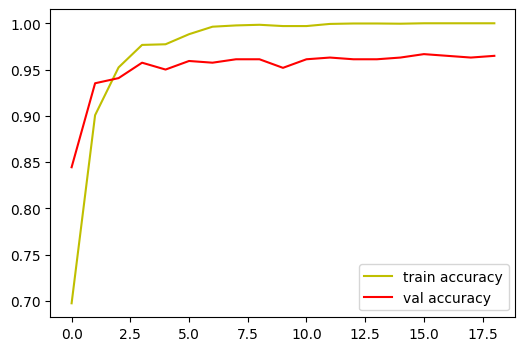

In [20]:
# accuracy curve
plt.figure(figsize=(6, 4))
plt.plot(lstm_h.history['accuracy'], 'y', label='train accuracy')
plt.plot(lstm_h.history['val_accuracy'], 'r', label='val accuracy')
plt.legend()
plt.show()

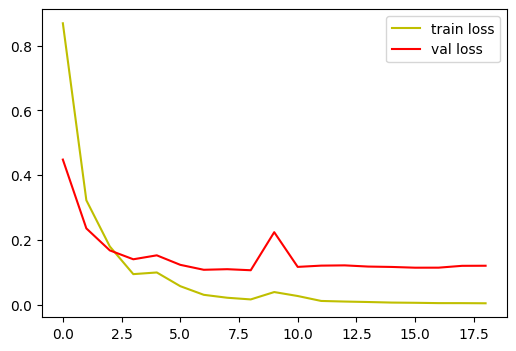

In [21]:
#loss curve
plt.figure(figsize=(6,4))
plt.plot(lstm_h.history['loss'][:], 'y', label='train loss')
plt.plot(lstm_h.history['val_loss'][:], 'r', label='val loss')
plt.legend()
plt.show()

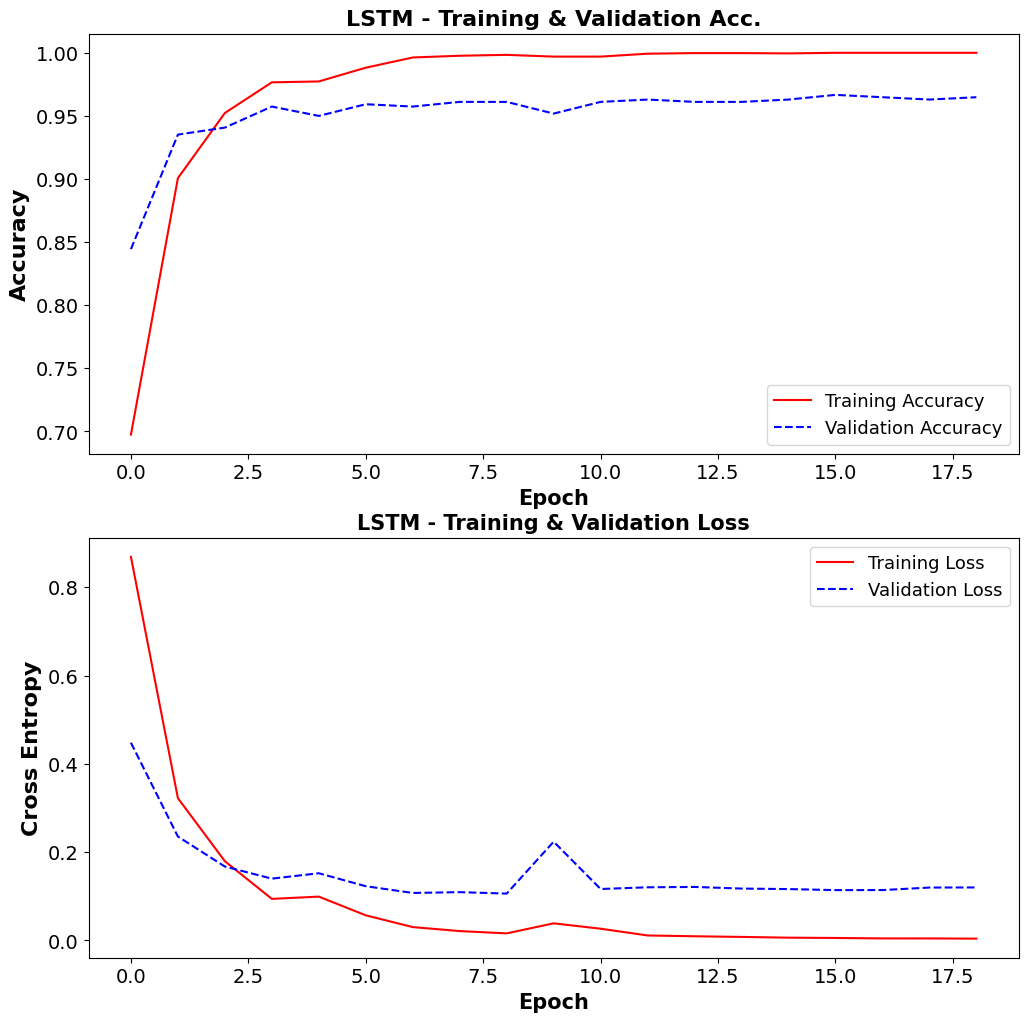

In [23]:
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']
loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b', linestyle='--') # Modify linestyle for validation accuracy
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b', linestyle='--') # Modify linestyle for validation loss
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()
